In [110]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from fedot_ind.api.utils.path_lib import PROJECT_PATH


In [111]:
path_to_datasets = PROJECT_PATH + '/benchmark/results/ts_uni_classification'
path_to_results_2024 = PROJECT_PATH+'/benchmark/results/time_series_uni_clf_09022024.csv'
path_to_results_foundational = PROJECT_PATH+'/benchmark/results/results_ucr.csv'
path_to_server_results_2024 = PROJECT_PATH+'/benchmark/results/server_results/ts_uni_classification'
clf_comp = pd.read_csv(path_to_results_2024, sep=',',decimal=',', index_col=0).astype(float)
clf_found = pd.read_csv(path_to_results_foundational, sep=',',decimal=',', index_col=0).astype(float)
del clf_found['ResNet'], clf_found['H-InceptionTime (baseline)']


In [112]:
clf_comp  = pd.concat([clf_comp,clf_found], axis=1)
clf_comp = clf_comp.fillna(0)

In [113]:
clf_comp

,FreshPRINCE,HC2,Hydra-MR,InceptionT,PF,RDST,RSTSF,WEASEL_D,TS-CHIEF,"HIVE-COTE v1,0",...,S-BOSS,cBOSS,BOSS,RISE,TSF,Catch22,Fedot_Industrial,Fedot_Industrial_finetuned,MultiROCKET,PHIT
Phoneme,0.345464,0.377637,0.353376,0.337025,0.312764,0.339662,0.389241,0.339135,0.370,0.371,...,0.280,0.273,0.255,0.347,0.194,0.300,0.406,0.394,0.347574,0.345464
Crop,0.770417,0.759464,0.778690,0.798512,0.755655,0.771310,0.776012,0.760952,0.762,0.768,...,0.708,0.701,0.686,0.730,0.746,0.653,0.803,0.803,0.774762,0.773333
MiddlePhalanxTW,0.558442,0.577922,0.519481,0.532468,0.538961,0.532468,0.584416,0.558442,0.573,0.584,...,0.542,0.567,0.532,0.585,0.569,0.557,0.809,0.803,0.538961,0.519481
CricketX,0.710256,0.828205,0.812821,0.848718,0.800000,0.817949,0.753846,0.807692,0.830,0.816,...,0.784,0.764,0.762,0.706,0.693,0.609,0.879,0.867,0.807692,0.871795
Ham,0.742857,0.723810,0.742857,0.723810,0.685714,0.714286,0.790476,0.790476,0.805,0.840,...,0.835,0.811,0.837,0.820,0.799,0.694,0.900,0.900,0.723810,0.752381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PigArtPressure,0.913462,1.000000,0.961538,1.000000,0.668269,0.947115,0.894231,0.975962,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000
FacesUCR,0.897561,0.964878,0.959024,0.972195,0.946341,0.963415,0.900488,0.957073,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.961463,0.953659
UWaveGestureLibraryX,0.840313,0.856226,0.872418,0.822166,0.827192,0.854830,0.827471,0.840592,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.869626,0.845617
MelbournePedestrian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.962690,0.909389


In [114]:
for i in os.listdir(path_to_datasets):
    try:
        metric_report = Path(path_to_datasets, i, 'metrics_report.csv')
        data = pd.read_csv(metric_report, index_col=0)
        new_metric = float(data.loc[i, ['Fedot_Industrial']].values)
        if 'Fedot_Industrial_finetuned' in data.columns:
            new_metric_tuned = float(data.loc[i, ['Fedot_Industrial_finetuned']].values)
        else:
            new_metric_tuned = 0
        if i in os.listdir(path_to_server_results_2024):
            metric_report_server = Path(path_to_server_results_2024, i, 'metrics_report.csv')
            data_server = pd.read_csv(metric_report_server, index_col=0)
            new_metric_server = float(data_server.loc[i, ['Fedot_Industrial']].values)
        else:
            new_metric_server = 0
        old_metric = float(clf_comp.loc[i, ['Fedot_Industrial']].values)
        best_metric =  max(old_metric,new_metric_server,new_metric)
        print(f'-----------------------------------------------------\n'
              f'Result for dataset - {i}\n'
              f'old_metric - {old_metric}\n'
              f'new metric - {new_metric}\n'
               f'new metric_tuned - {new_metric_tuned}\n'
              f'server metric - {new_metric_server}\n'
              f'best_metric - {best_metric}\n'
              f'-----------------------------------------------------\n')
        clf_comp.loc[i, ['Fedot_Industrial']] = best_metric
        clf_comp.loc[i, ['Fedot_Industrial_finetuned']] = new_metric_tuned
    except Exception as e:
        print(f"{e}")
        print(f"{i}")

-----------------------------------------------------
Result for dataset - Adiac
old_metric - 1.0
new metric - 0.2506393861892583
new metric_tuned - 0
server metric - 0
best_metric - 1.0
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - Beef
old_metric - 0.8666666666666667
new metric - 0.8666666666666667
new metric_tuned - 0
server metric - 0
best_metric - 0.8666666666666667
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - BeetleFly
old_metric - 0.0
new metric - 0.7
new metric_tuned - 0
server metric - 0
best_metric - 0.7
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - BirdChicken
old_metric - 0.0
new metric - 0.9
new metric_tuned - 0.9
server metric - 0
best_metric - 0.9
-----------------------------------------------------

---------------------

In [118]:
clf_comp

,FreshPRINCE,HC2,Hydra-MR,InceptionT,PF,RDST,RSTSF,WEASEL_D,TS-CHIEF,"HIVE-COTE v1,0",...,WEASEL,S-BOSS,cBOSS,BOSS,RISE,TSF,Catch22,MultiROCKET,PHIT,Fedot_Industrial_best
Phoneme,0.345464,0.377637,0.353376,0.337025,0.312764,0.339662,0.389241,0.339135,0.370,0.371,...,0.259,0.280,0.273,0.255,0.347,0.194,0.300,0.347574,0.345464,0.406000
Crop,0.770417,0.759464,0.778690,0.798512,0.755655,0.771310,0.776012,0.760952,0.762,0.768,...,0.724,0.708,0.701,0.686,0.730,0.746,0.653,0.774762,0.773333,0.803000
MiddlePhalanxTW,0.558442,0.577922,0.519481,0.532468,0.538961,0.532468,0.584416,0.558442,0.573,0.584,...,0.554,0.542,0.567,0.532,0.585,0.569,0.557,0.538961,0.519481,0.809000
CricketX,0.710256,0.828205,0.812821,0.848718,0.800000,0.817949,0.753846,0.807692,0.830,0.816,...,0.776,0.784,0.764,0.762,0.706,0.693,0.609,0.807692,0.871795,0.879000
Ham,0.742857,0.723810,0.742857,0.723810,0.685714,0.714286,0.790476,0.790476,0.805,0.840,...,0.821,0.835,0.811,0.837,0.820,0.799,0.694,0.723810,0.752381,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PigArtPressure,0.913462,1.000000,0.961538,1.000000,0.668269,0.947115,0.894231,0.975962,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.591346
FacesUCR,0.897561,0.964878,0.959024,0.972195,0.946341,0.963415,0.900488,0.957073,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.961463,0.953659,0.778049
UWaveGestureLibraryX,0.840313,0.856226,0.872418,0.822166,0.827192,0.854830,0.827471,0.840592,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.869626,0.845617,0.000000
MelbournePedestrian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.962690,0.909389,0.000000


In [116]:
clf_comp['Fedot_Industrial_best'] = clf_comp.apply(lambda row: max(row.loc['Fedot_Industrial'],row.loc['Fedot_Industrial_finetuned']), axis=1)
del clf_comp['Fedot_Industrial'], clf_comp['Fedot_Industrial_finetuned']

In [117]:
def categorize_dataset(metric):
    if metric < 5:
        return 'Easy to solve dataset'
    elif 5 < metric < 10:
        return 'Normal to solve dataset'
    elif 10 < metric < 15:
        return 'Hard to solve dataset'
    else:
        return 'Extraordinary Hard to solve dataset'

In [119]:
clf_comp['Difference %'] = (-(clf_comp.iloc[:, :-1].max(axis=1) - clf_comp['Fedot_Industrial_best']) / clf_comp.iloc[:,
                                                                                                 :-1].max(axis=1)) * 100
clf_comp = clf_comp.fillna(0)
clf_comp = clf_comp[clf_comp['Fedot_Industrial_best']>0]
clf_comp['Metric dispersion by dataset'] = (clf_comp.iloc[:, :-2].std(axis=1)/clf_comp.iloc[:, :-2].max(axis=1))*100
clf_comp['dataset_category'] = clf_comp['Metric dispersion by dataset'].apply(categorize_dataset)
clf_comp

,FreshPRINCE,HC2,Hydra-MR,InceptionT,PF,RDST,RSTSF,WEASEL_D,TS-CHIEF,"HIVE-COTE v1,0",...,BOSS,RISE,TSF,Catch22,MultiROCKET,PHIT,Fedot_Industrial_best,Difference %,Metric dispersion by dataset,dataset_category
Phoneme,0.345464,0.377637,0.353376,0.337025,0.312764,0.339662,0.389241,0.339135,0.370,0.371,...,0.255,0.347,0.194,0.300,0.347574,0.345464,0.406000,4.305691,12.256677,Hard to solve dataset
Crop,0.770417,0.759464,0.778690,0.798512,0.755655,0.771310,0.776012,0.760952,0.762,0.768,...,0.686,0.730,0.746,0.653,0.774762,0.773333,0.803000,0.562057,4.274930,Easy to solve dataset
MiddlePhalanxTW,0.558442,0.577922,0.519481,0.532468,0.538961,0.532468,0.584416,0.558442,0.573,0.584,...,0.532,0.585,0.569,0.557,0.538961,0.519481,0.809000,37.118644,3.787493,Easy to solve dataset
CricketX,0.710256,0.828205,0.812821,0.848718,0.800000,0.817949,0.753846,0.807692,0.830,0.816,...,0.762,0.706,0.693,0.609,0.807692,0.871795,0.879000,0.826471,6.766545,Normal to solve dataset
Ham,0.742857,0.723810,0.742857,0.723810,0.685714,0.714286,0.790476,0.790476,0.805,0.840,...,0.837,0.820,0.799,0.694,0.723810,0.752381,0.900000,5.263158,5.911434,Normal to solve dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DistalPhalanxOutlineAgeGroup,0.755396,0.762590,0.769784,0.733813,0.733813,0.784173,0.719424,0.762590,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,0.769784,-1.834862,46.769967,Extraordinary Hard to solve dataset
GunPointMaleVersusFemale,0.984177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993671,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,1.000000,-0.000000,48.564702,Extraordinary Hard to solve dataset
CricketZ,0.753846,0.864103,0.838462,0.848718,0.805128,0.856410,0.776923,0.800000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.835897,0.915385,0.666667,-27.170868,46.047063,Extraordinary Hard to solve dataset
PigArtPressure,0.913462,1.000000,0.961538,1.000000,0.668269,0.947115,0.894231,0.975962,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,0.591346,-40.865385,45.222480,Extraordinary Hard to solve dataset


In [120]:
fedot_vs_found = clf_comp[clf_comp['PHIT']!=0].loc[:,['Fedot_Industrial_best','PHIT']]

In [121]:
fedot_vs_found ['Difference %'] = (fedot_vs_found['Fedot_Industrial_best']-fedot_vs_found['PHIT'])*100

In [122]:
fedot_vs_found[fedot_vs_found['Difference %']>0]

,Fedot_Industrial_best,PHIT,Difference %
Phoneme,0.406000,0.345464,6.053586e+00
Crop,0.803000,0.773333,2.966667e+00
MiddlePhalanxTW,0.809000,0.519481,2.895195e+01
CricketX,0.879000,0.871795,7.205128e-01
Ham,0.900000,0.752381,1.476190e+01
ArrowHead,0.901000,0.828571,7.242857e+00
ECG200,0.936000,0.910000,2.600000e+00
SmallKitchenAppliances,0.936000,0.778667,1.573333e+01
Herring,0.957000,0.765625,1.913750e+01
ACSF1,0.973000,0.900000,7.300000e+00


In [131]:
clf_comp[clf_comp['Difference %'].between(-10,-5)].index.values.tolist()

['OliveOil',
 'HandOutlines',
 'PigAirwayPressure',
 'OSULeaf',
 'SemgHandSubjectCh2',
 'Fish',
 'SemgHandGenderCh2',
 'DistalPhalanxOutlineCorrect',
 'MixedShapesRegularTrain',
 'SwedishLeaf',
 'DistalPhalanxTW',
 'BirdChicken',
 'FordB',
 'ChlorineConcentration',
 'FaceFour',
 'Computers',
 'ShapeletSim',
 'Rock',
 'SonyAIBORobotSurface2',
 'MoteStrain']

In [130]:
clf_comp

,FreshPRINCE,HC2,Hydra-MR,InceptionT,PF,RDST,RSTSF,WEASEL_D,TS-CHIEF,"HIVE-COTE v1,0",...,BOSS,RISE,TSF,Catch22,MultiROCKET,PHIT,Fedot_Industrial_best,Difference %,Metric dispersion by dataset,dataset_category
Phoneme,0.345464,0.377637,0.353376,0.337025,0.312764,0.339662,0.389241,0.339135,0.370,0.371,...,0.255,0.347,0.194,0.300,0.347574,0.345464,0.406000,4.305691,12.256677,Hard to solve dataset
Crop,0.770417,0.759464,0.778690,0.798512,0.755655,0.771310,0.776012,0.760952,0.762,0.768,...,0.686,0.730,0.746,0.653,0.774762,0.773333,0.803000,0.562057,4.274930,Easy to solve dataset
MiddlePhalanxTW,0.558442,0.577922,0.519481,0.532468,0.538961,0.532468,0.584416,0.558442,0.573,0.584,...,0.532,0.585,0.569,0.557,0.538961,0.519481,0.809000,37.118644,3.787493,Easy to solve dataset
CricketX,0.710256,0.828205,0.812821,0.848718,0.800000,0.817949,0.753846,0.807692,0.830,0.816,...,0.762,0.706,0.693,0.609,0.807692,0.871795,0.879000,0.826471,6.766545,Normal to solve dataset
Ham,0.742857,0.723810,0.742857,0.723810,0.685714,0.714286,0.790476,0.790476,0.805,0.840,...,0.837,0.820,0.799,0.694,0.723810,0.752381,0.900000,5.263158,5.911434,Normal to solve dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DistalPhalanxOutlineAgeGroup,0.755396,0.762590,0.769784,0.733813,0.733813,0.784173,0.719424,0.762590,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,0.769784,-1.834862,46.769967,Extraordinary Hard to solve dataset
GunPointMaleVersusFemale,0.984177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993671,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,1.000000,-0.000000,48.564702,Extraordinary Hard to solve dataset
CricketZ,0.753846,0.864103,0.838462,0.848718,0.805128,0.856410,0.776923,0.800000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.835897,0.915385,0.666667,-27.170868,46.047063,Extraordinary Hard to solve dataset
PigArtPressure,0.913462,1.000000,0.961538,1.000000,0.668269,0.947115,0.894231,0.975962,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,0.591346,-40.865385,45.222480,Extraordinary Hard to solve dataset


In [125]:
model_df = clf_comp.iloc[:,:-3]
not_stable_models = list(model_df.mean().sort_values(ascending=True)[:5].index)
model_df.mean().sort_values(ascending=False)

HC2                      0.880399
Hydra-MR                 0.871125
RDST                     0.867197
Fedot_Industrial_best    0.865574
WEASEL_D                 0.864803
InceptionT               0.861639
RSTSF                    0.851540
FreshPRINCE              0.843928
PF                       0.822268
MultiROCKET              0.664627
PHIT                     0.662718
HIVE-COTE v1,0           0.493314
TS-CHIEF                 0.491137
STC                      0.481755
ROCKET                   0.480971
ProximityForest          0.470422
S-BOSS                   0.469275
WEASEL                   0.466382
BOSS                     0.466029
cBOSS                    0.465539
ResNet                   0.461853
TSF                      0.454167
RISE                     0.449971
Catch22                  0.439127
dtype: float64

# Compute ranks

In [126]:
clear_csv = clf_comp.iloc[:, :-3]
pd.DataFrame(clear_csv.rank(axis=1, ascending=False).mean(axis=0).sort_values(), columns=['mean rank'])

,mean rank
HC2,5.764706
Hydra-MR,6.799020
RDST,8.034314
WEASEL_D,8.397059
InceptionT,8.411765
Fedot_Industrial_best,9.093137
RSTSF,9.166667
FreshPRINCE,9.573529
MultiROCKET,9.813725
PHIT,10.990196


Fedot.ind has mean rank 8.16 . It's the 9'th place comparing with SOTA

In [127]:
top_1 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(1)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-1']).fillna(0)
top_3 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(3)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-3'])
top_5 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(5)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-5'])
top_half = pd.DataFrame(clear_csv.T.apply(lambda x: x.nlargest(7)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-half'])
pd.concat([top_1, top_3, top_5, top_half], axis=1).fillna(0)

,top-1,top-3,top-5,top-half
Fedot_Industrial_best,17.0,23.0,28.0,33
FreshPRINCE,15.0,20.0,26.0,42
HC2,14.0,44.0,66.0,83
InceptionT,11.0,25.0,47.0,65
PHIT,11.0,25.0,33.0,41
Hydra-MR,9.0,38.0,61.0,75
RSTSF,6.0,18.0,23.0,53
RDST,5.0,21.0,36.0,58
WEASEL_D,4.0,16.0,30.0,45
TS-CHIEF,3.0,9.0,19.0,25


In [128]:
from copy import deepcopy

groupby_df = deepcopy(clf_comp)
del groupby_df['Difference %'], groupby_df['Metric dispersion by dataset']
groupby_df = clf_comp.groupby(by = 'dataset_category').mean()
groupby_df= groupby_df.iloc[:,:]
groupby_df['Difference in each category %'] = (groupby_df['Fedot_Industrial_best']-groupby_df.iloc[:, :-1].max(axis=1))*100
groupby_df['Difference in each category %']

dataset_category
Easy to solve dataset                   -0.576115
Extraordinary Hard to solve dataset     -5.001885
Hard to solve dataset                    0.000000
Normal to solve dataset               -301.144823
Name: Difference in each category %, dtype: float64

# Rank Distribution

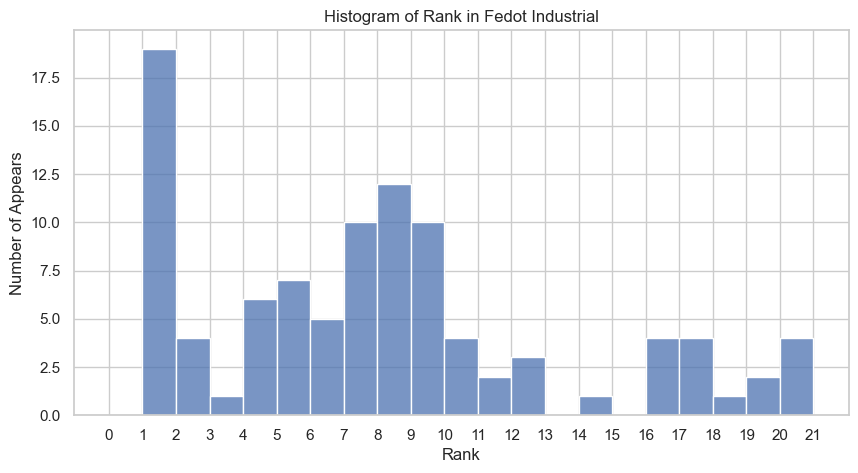

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=False) 
bins = np.arange(clear_csv.shape[1])
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with seaborn
sns.histplot(quantiles.loc[:, 'Fedot_Industrial_best'], bins=bins)

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Number of Appears')
plt.xticks(bins)
plt.title('Histogram of Rank in Fedot Industrial')

# Show the plot
plt.show()

Fedot ind tends to make accurate predictions either poor predictions. 

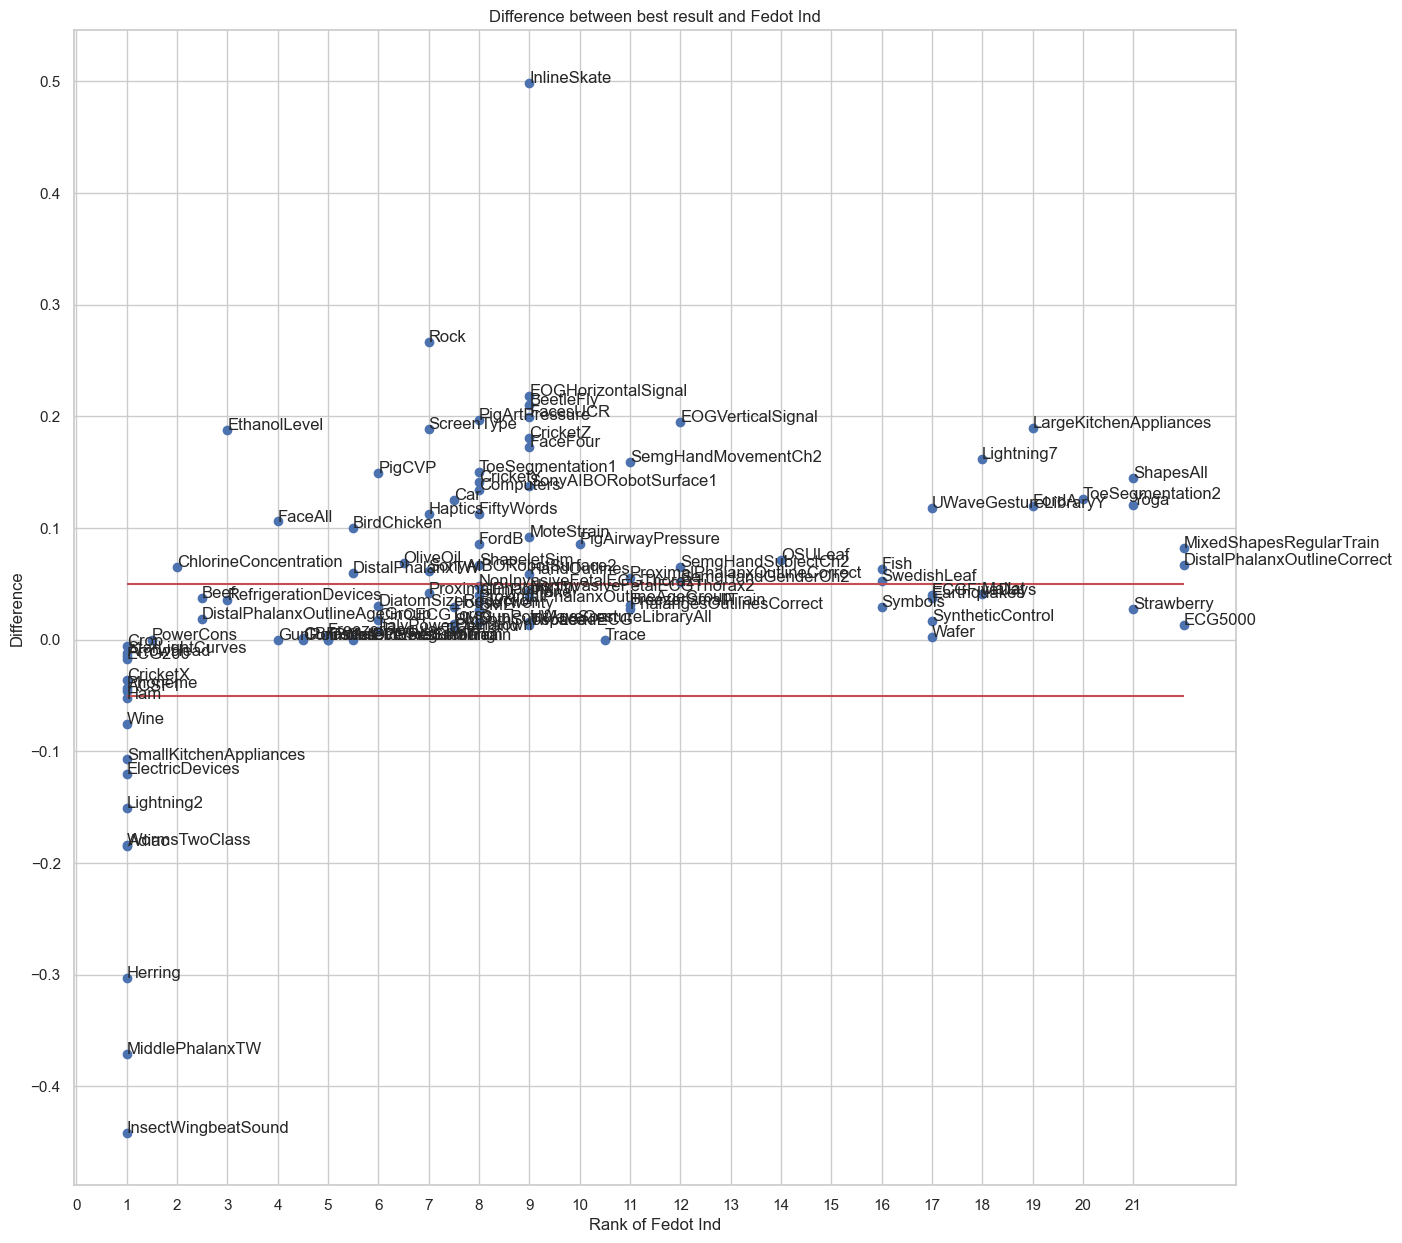

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=False) 
differences_from_first_place = (clear_csv.iloc[:, :-2].max(axis=1) - clear_csv['Fedot_Industrial_best']) / clear_csv.iloc[:, :-2].max(axis=1)
# Set the style of the plot
sns.set(style="whitegrid")
plt.xticks(np.arange(0, clear_csv.shape[1], 1))
plt.yticks(np.arange(-0.4, 1, 0.1))
# Create a histogram with seaborn
plt.scatter(quantiles.loc[:, 'Fedot_Industrial_best'], differences_from_first_place)
for i in range(len(quantiles.loc[:, 'Fedot_Industrial_best'])):
    plt.annotate(clf_comp.index.values[i], (quantiles.loc[:, 'Fedot_Industrial_best'].values[i], differences_from_first_place.values[i]))
plt.hlines(y = 0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
plt.hlines(y = -0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
# Add labels and title
plt.xlabel('Rank of Fedot Ind')
plt.ylabel('Difference')
plt.title('Difference between best result and Fedot Ind')

# Show the plot
plt.show()

# Good solutions

In [88]:
good_idx = clf_comp.sort_values(by='Difference %', ascending=False).iloc[:10, :].index.values
good_idx

array(['InsectWingbeatSound', 'MiddlePhalanxTW', 'Herring', 'Adiac',
       'WormsTwoClass', 'Lightning2', 'ElectricDevices',
       'SmallKitchenAppliances', 'Wine', 'Ham'], dtype=object)

InsectWingbeatSound


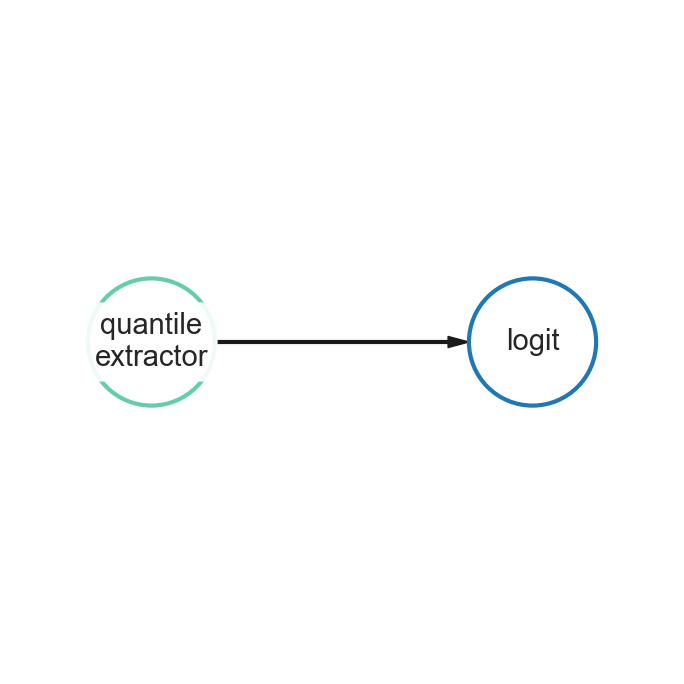

MiddlePhalanxTW


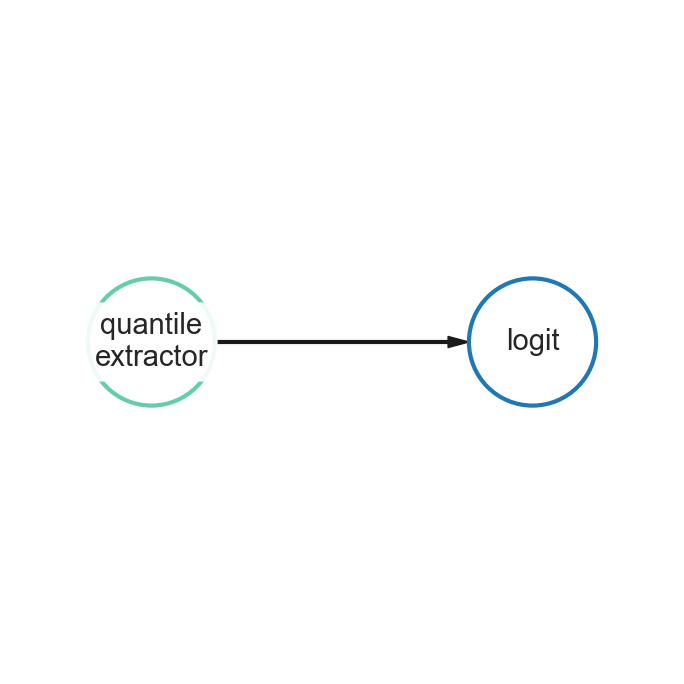

Herring


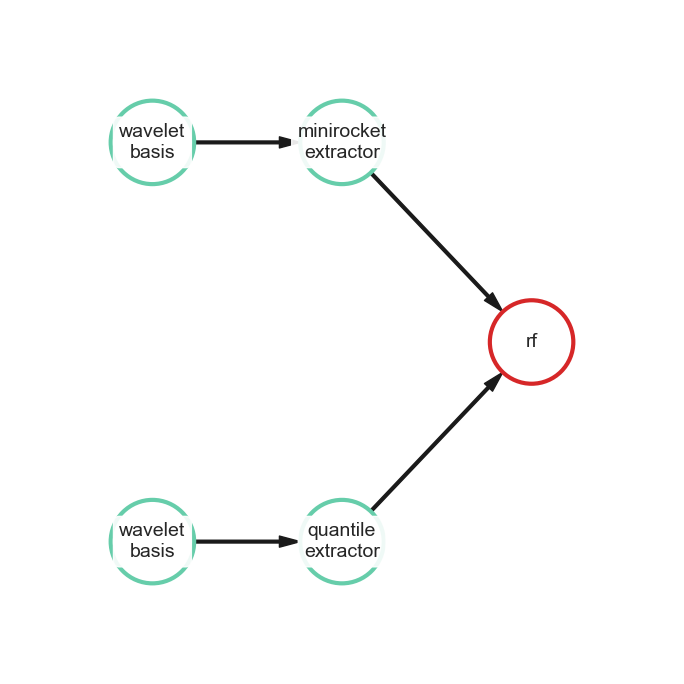

Adiac


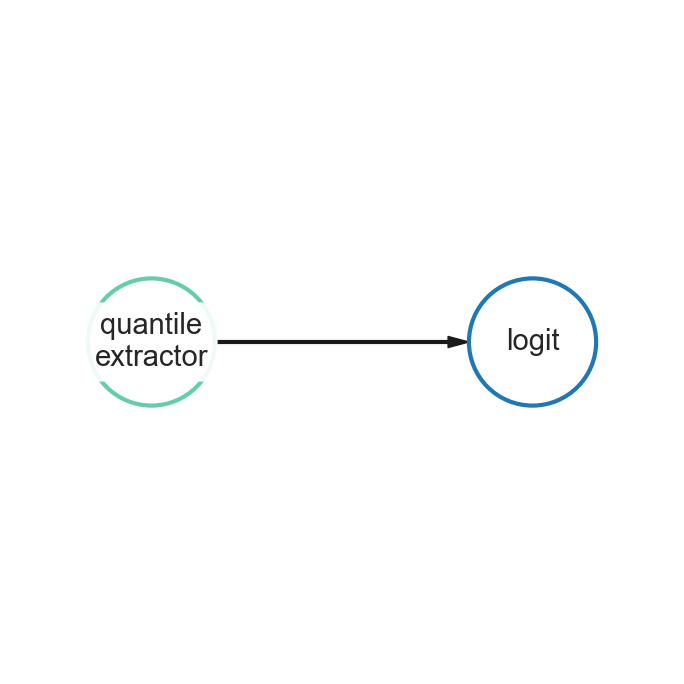

WormsTwoClass


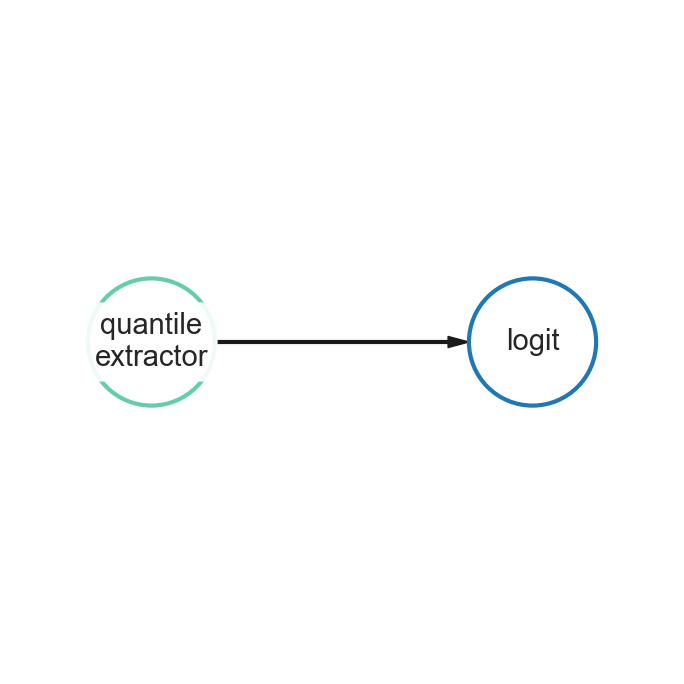

Lightning2


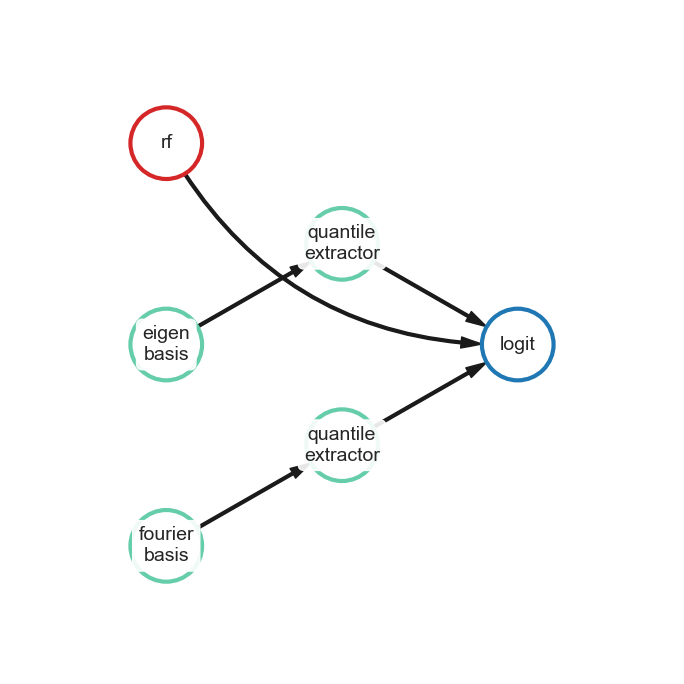

ElectricDevices


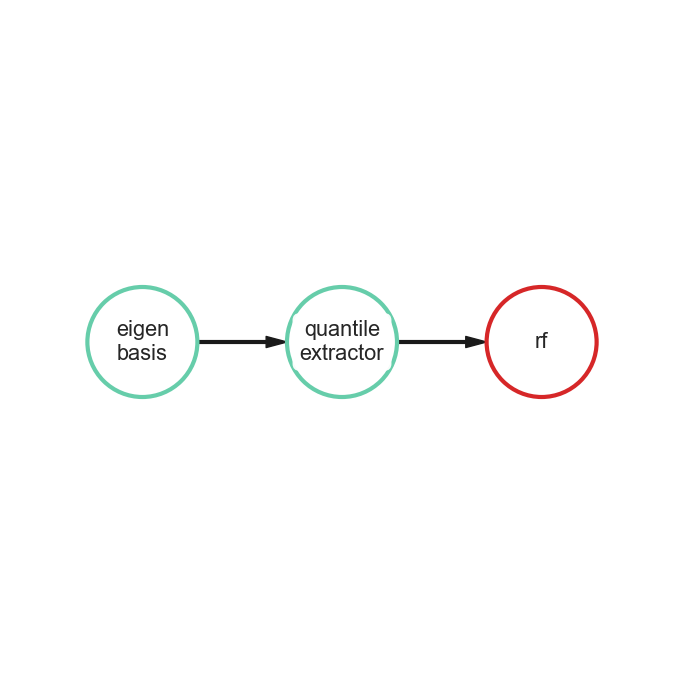

SmallKitchenAppliances


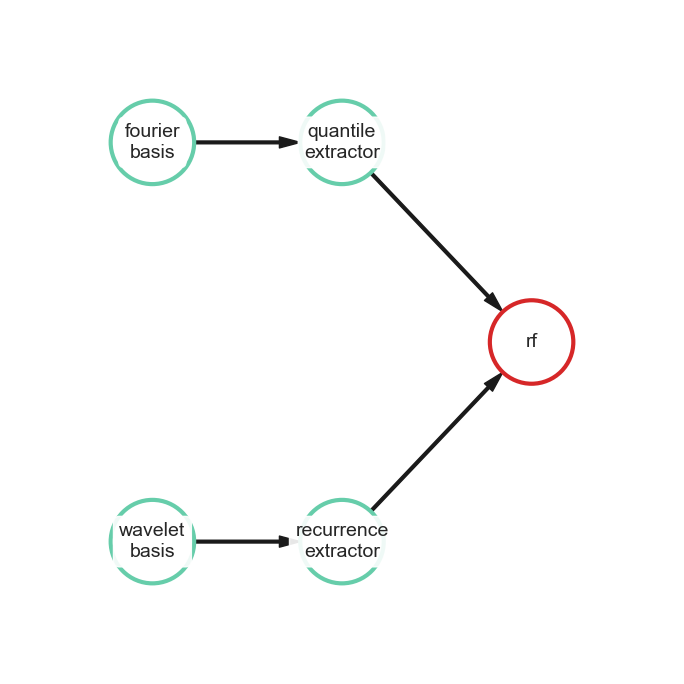

Wine


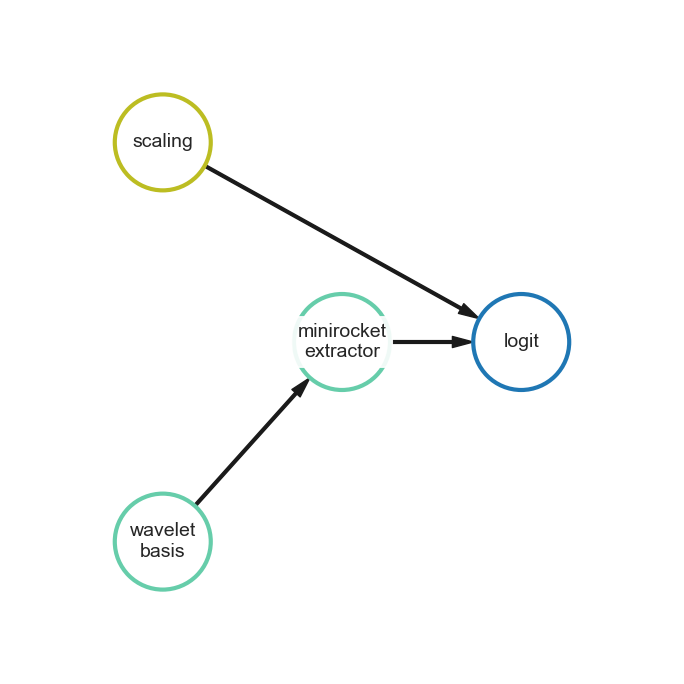

Ham


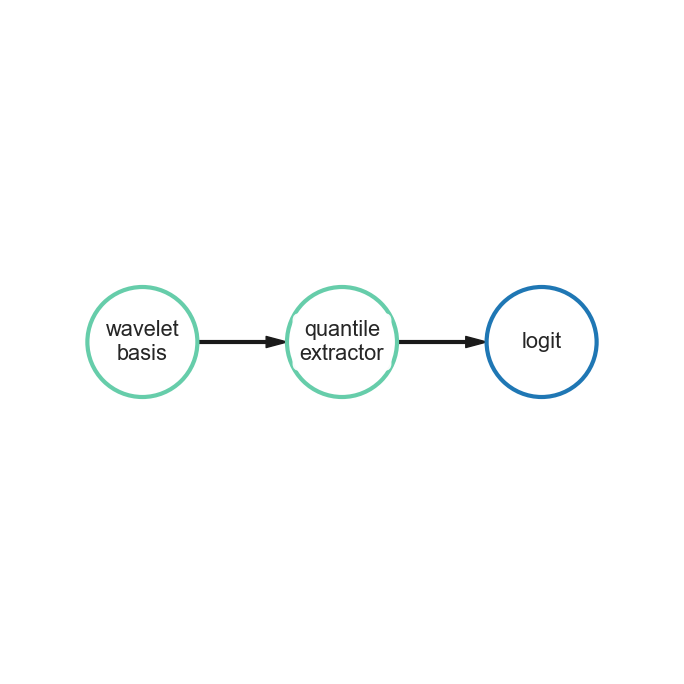

In [90]:
from fedot.core.pipelines.pipeline import Pipeline
prefix = 'pipeline_saved'
for idx in good_idx:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')

# Bad solutions

In [91]:
bad_idx = clf_comp.sort_values(by='Difference %', ascending=True).iloc[:10, :].index.values
bad_idx

array(['InlineSkate', 'Rock', 'EOGHorizontalSignal', 'BeetleFly',
       'FacesUCR', 'PigArtPressure', 'EOGVerticalSignal',
       'LargeKitchenAppliances', 'ScreenType', 'EthanolLevel'],
      dtype=object)

InlineSkate


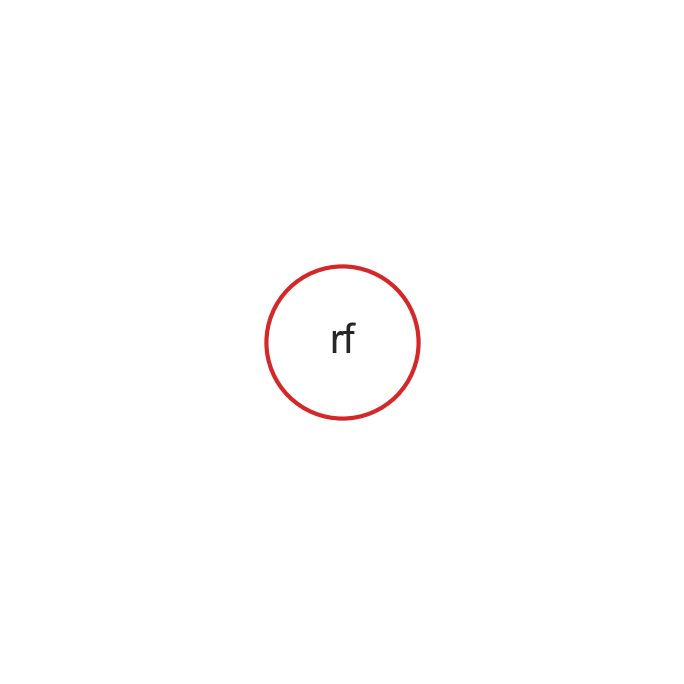

Rock


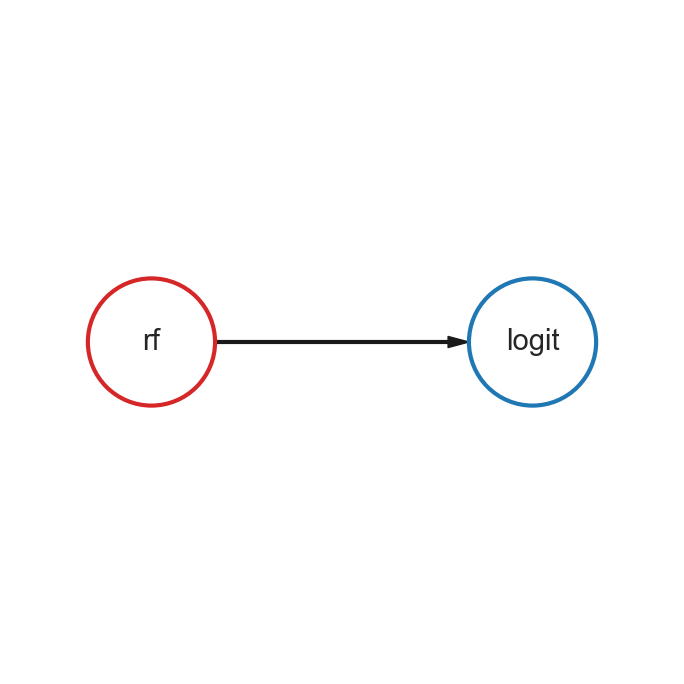

EOGHorizontalSignal


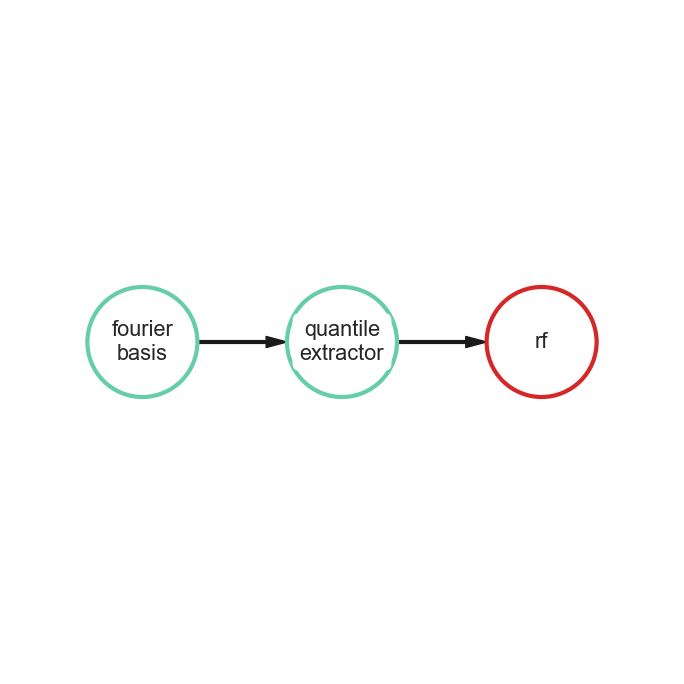

BeetleFly
For BeetleFly no results!
FacesUCR
For FacesUCR no results!
PigArtPressure


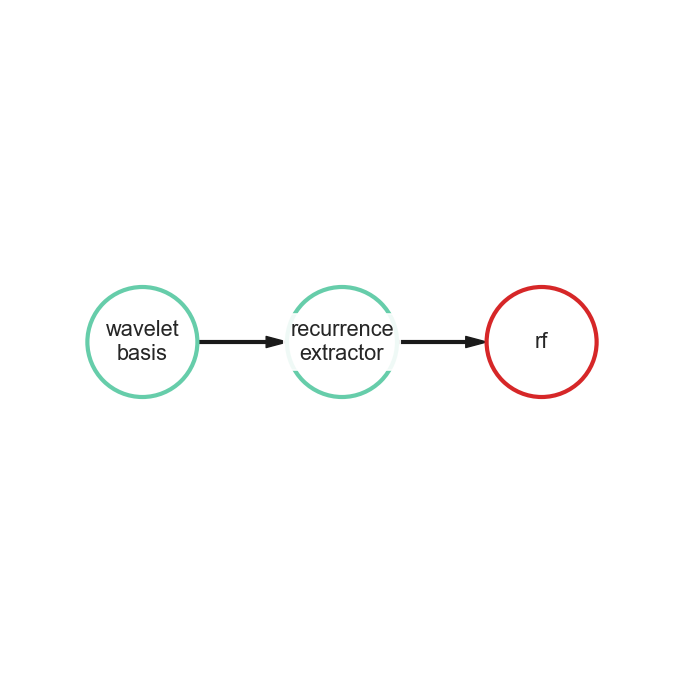

EOGVerticalSignal
For EOGVerticalSignal no results!
LargeKitchenAppliances


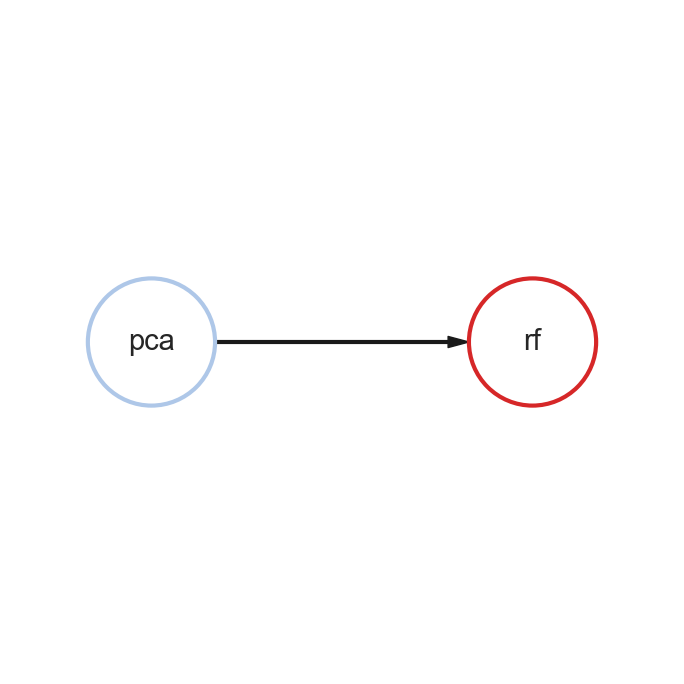

ScreenType
For ScreenType no results!
EthanolLevel
For EthanolLevel no results!


In [92]:
from fedot.core.pipelines.pipeline import Pipeline
for idx in bad_idx:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')